# Gather and Assess
First, we load survey results from each of the three last years, and then check each dataframe head to assess it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

df_17 = pd.read_csv('./survey_results_public_2017.csv')
print(df_17.head())

df_18 = pd.read_csv('./survey_results_public_2018.csv')
print(df_18.head())

df_19 = pd.read_csv('./survey_results_public_2019.csv')
print(df_19.head())

   Respondent                                       Professional  \
0           1                                            Student   
1           2                                            Student   
2           3                             Professional developer   
3           4  Professional non-developer who sometimes write...   
4           5                             Professional developer   

                ProgramHobby         Country      University  \
0                  Yes, both   United States              No   
1                  Yes, both  United Kingdom  Yes, full-time   
2                  Yes, both  United Kingdom              No   
3                  Yes, both   United States              No   
4  Yes, I program as a hobby     Switzerland              No   

                         EmploymentStatus  \
0  Not employed, and not looking for work   
1                      Employed part-time   
2                      Employed full-time   
3                      Emp

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology,

# Clean and Analyze
Now, we clean the language column, so we can better analyze which are the most used languages in the last years

In [2]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

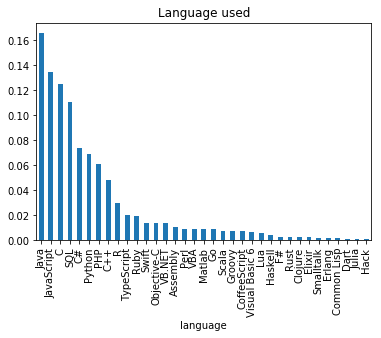

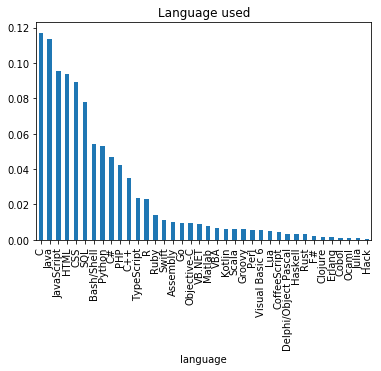

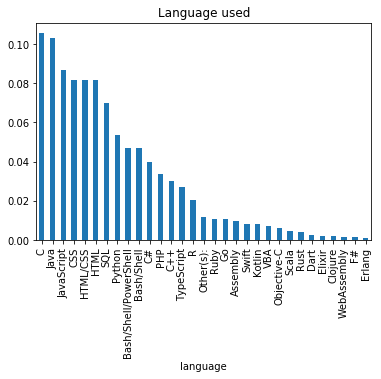

In [3]:
possible_vals = ['Assembly','Bash/Shell','Bash/Shell/PowerShell','C','C#','C++','Clojure','Cobol','CoffeeScript','Common Lisp',
                 'CSS','Dart','Delphi/Object Pascal','Elixir','Erlang','F#','Go','Groovy','Hack','Haskell','HTML','HTML/CSS',
                 'Java','JavaScript','Julia','Kotlin','Lua','Matlab','NA','Objective-C','Ocaml','Other(s):','Perl','PHP',
                 'Python','R','Ruby','Rust','Scala','Smalltalk','SQL','Swift','TypeScript','VB.NET','VBA','Visual Basic 6',
                 'WebAssembly']

def clean_and_plot(df, column, title='Language used', plot=True):
    '''
    INPUT 
        df - a dataframe holding the language column
        title - string the title of your plot
        column - name of the column that contains language responses
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        language_df - a dataframe with the percentage of individuals that worked with each language
        Displays a plot of pretty things related to the language column.
    '''
#   Gets the count of how manuy individuals worked with each language
    language = df[column].value_counts().reset_index()
    language.rename(columns={'index': 'language', column: 'count'}, inplace=True)
    language_df = total_count(language, 'language', 'count', possible_vals)

#   Plots the graph with the percentage of individuals that worked with each language
    language_df.set_index('language', inplace=True)
    if plot:
        (language_df/language_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()

#   Create the dataframe with the percentage of individuals that worked with each language and returns it
    language_df = language_df/language_df.sum()
    return language_df
    
language_17 = clean_and_plot(df_17, 'HaveWorkedLanguage')
language_18 = clean_and_plot(df_18, 'LanguageWorkedWith')
language_19 = clean_and_plot(df_19, 'LanguageWorkedWith')

# Model and Visualize
Then, we finally make a ranking model and visualize the evolution of each language usage between the years

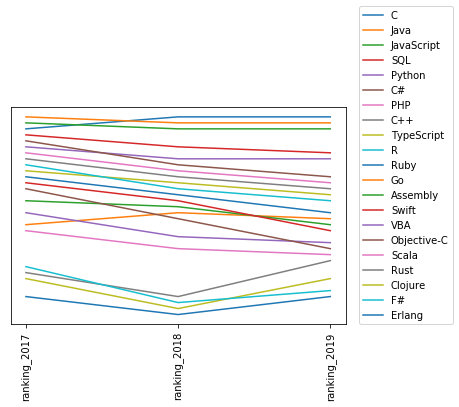

In [4]:
def ranking(df17, df18, df19, plot=True):
    '''
    INPUT 
        df17 - a dataframe holding how many individuals worked with each language in 2017
        df18 - a dataframe holding how many individuals worked with each language in 2018
        df19 - a dataframe holding how many individuals worked with each language in 2019
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        df - a dataframe with the ranking of each language, by year
        Displays a plot of with the ranking evolution of each language between 2017 and 2019.
    '''
#   Rename columns, so we have information for each year when we merge all dataframes
    df17.rename(columns={'language': 'language', 'count': '2017'}, inplace=True)
    df18.rename(columns={'language': 'language', 'count': '2018'}, inplace=True)
    df19.rename(columns={'language': 'language', 'count': '2019'}, inplace=True)

#   Create ranking column
    df17['ranking_2017'] = range(1, len(df17) + 1)
    df18['ranking_2018'] = range(1, len(df18) + 1)
    df19['ranking_2019'] = range(1, len(df19) + 1)

#   Merge dataframes into a unique one, with information from all 3 years
    df17_18 = pd.merge(df17, df18, on='language')
    df = pd.merge(df17_18, df19, on='language')

#   Drop percentage columns, mantaining only the ranking ones
    df = df.drop(['2017', '2018', '2019'], 1)

#   Negates all values, so the most used language will appear on top when we plot, then sort based on 2019 ranking
    df = -df
    df = df.sort_values(by=['ranking_2019'], ascending=False)
    
#   Transpose the dataframe
    df = df.T
    
#   Plot the graph showing the ranking evolution of each language between 2017 and 2019
    if (plot):
        df = df.reset_index()
        ax = df.plot()
        ax.set_xticks(df.index)
        ax.set_xticklabels(df['index'], rotation=90)
        ax.axes.get_yaxis().set_visible(False)
        ax.legend(loc=(1.04,0))
    
    return df

language_ranking = ranking(language_17, language_18, language_19)